In [332]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [333]:
from google.colab import drive

In [334]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [335]:
data = pd.read_csv("drive/MyDrive/train.csv")

In [336]:
#Viewing the top rows of the dataset
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5


In [337]:
#Viewing the bottom rows of the dataset
data.tail()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,21-09-2017,No,xxxxxxxx,...,-650.682758,27277.68,6,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,27-06-2016,No,xxxxxxxx,...,-638.123421,11069.71,28,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,11-09-2016,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,15-06-2017,No,xxxxxxxx,...,482.610000,2378.86,20,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,fffe43004900440033003600340034003200,Verlene Beaulieu,35,M,LBX0GLR,Town,Silver Membership,23-10-2015,No,xxxxxxxx,...,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


In [338]:
#Getting the shape of the dataset that is the rows and columns
print(data.shape)

(36992, 25)


In [339]:
#Getting all the columns
print("Features of the dataset")
data.columns

Features of the dataset


Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [340]:
#Getting the data types of all columns
print(data.dtypes)

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [341]:
#Looking for the description of the dataset
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [342]:
#checking unique values
data.nunique()

,0
customer_id,36992
Name,36992
age,55
gender,3
security_no,36992
region_category,3
membership_category,6
joining_date,1096
joined_through_referral,3
referral_id,11359


In [343]:

#Checking all the details of the dataset
data.info()
# It is clear that their are 243553 entries in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [344]:
data[['Name','internet_option']]

,Name,internet_option
0,Pattie Morrisey,Wi-Fi
1,Traci Peery,Mobile_Data
2,Merideth Mcmeen,Wi-Fi
3,Eufemia Cardwell,Mobile_Data
4,Meghan Kosak,Mobile_Data
...,...,...
36987,Cuc Tarr,Wi-Fi
36988,Jenni Stronach,Wi-Fi
36989,Luciana Kinch,Wi-Fi
36990,Tawana Ardoin,Mobile_Data


In [345]:
data.internet_option.value_counts()

,count
internet_option,
Wi-Fi,12413
Mobile_Data,12343
Fiber_Optic,12236


Missing Values

In [346]:
#Checking the count of missing values
#print(data.isna().sum())
print(data.isnull().sum())

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


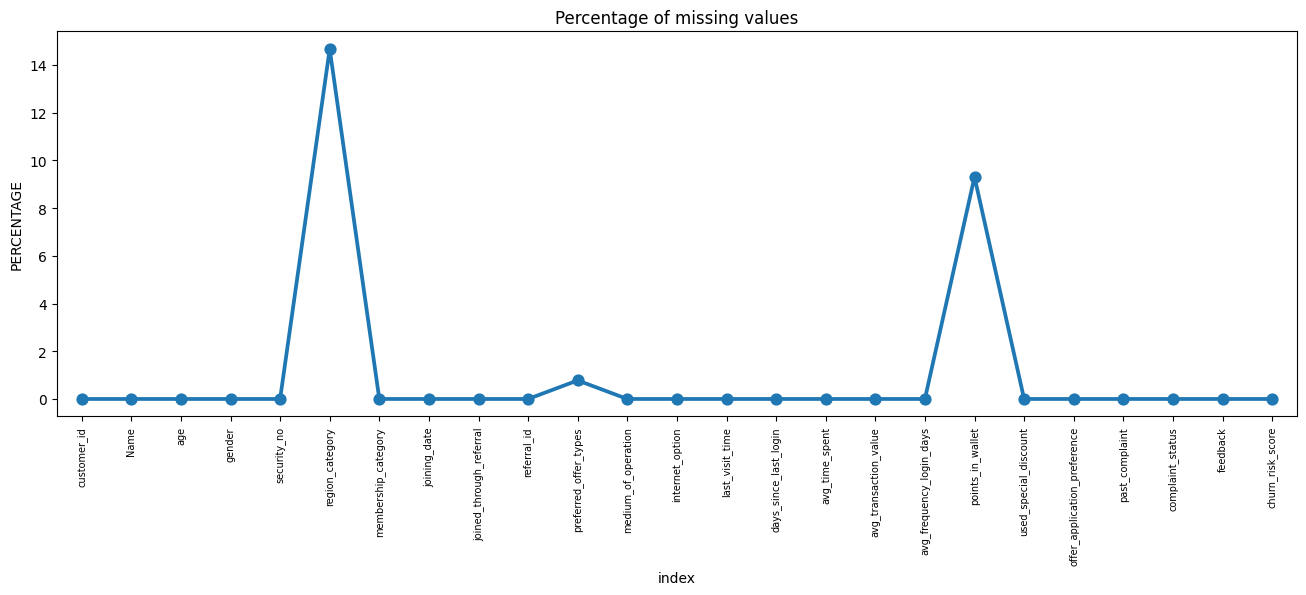

In [347]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
x = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()
#Since here are no missing values, so no variation is shown

In [348]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [349]:
data.region_category.mode()[0]

'Town'

In [350]:
#filling the categorical column
data['region_category']= data['region_category'].fillna(data['region_category'].mode()[0])
data['preferred_offer_types']= data['preferred_offer_types'].fillna(data['preferred_offer_types'].mode()[0])

In [351]:
#filling the numerical columns
data['points_in_wallet']= data['points_in_wallet'].fillna(data['points_in_wallet'].mean())

In [352]:
data.isnull().sum()

,0
customer_id,0
Name,0
age,0
gender,0
security_no,0
region_category,0
membership_category,0
joining_date,0
joined_through_referral,0
referral_id,0


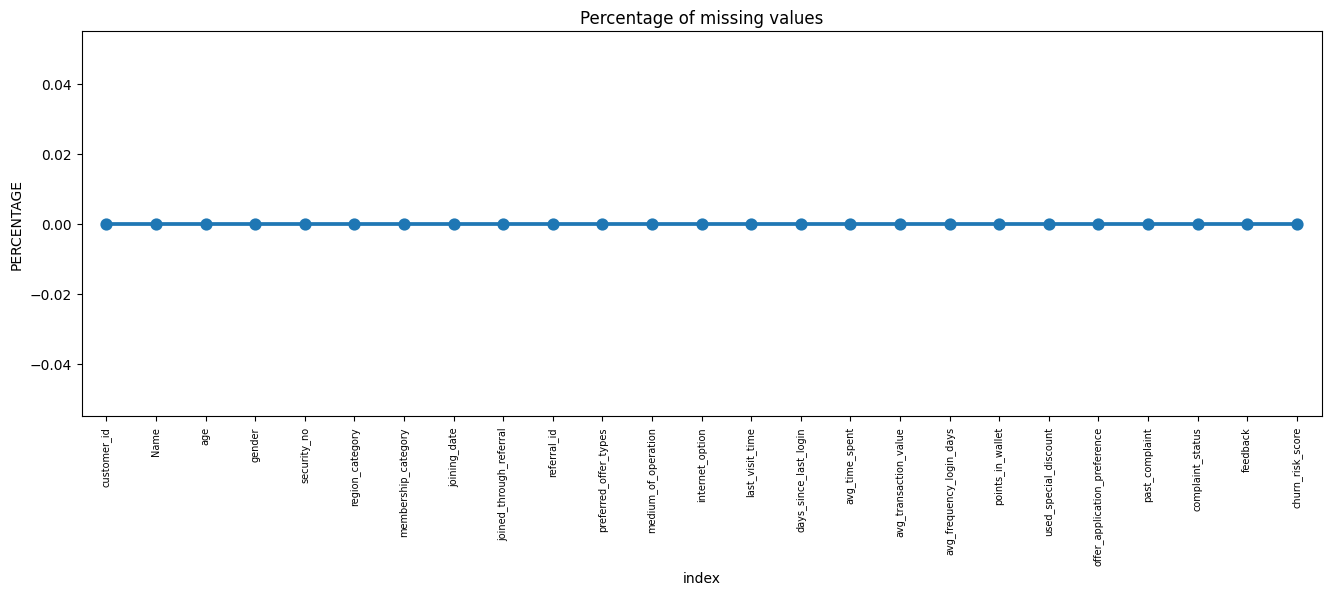

In [353]:

missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
x = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()
#Since here are no missing values, so no variation is shown

In [354]:
#Checking Duplicate Values
len(data[data.duplicated()])

0

In [355]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [356]:
data.isnull().any()

,0
customer_id,False
Name,False
age,False
gender,False
security_no,False
region_category,False
membership_category,False
joining_date,False
joined_through_referral,False
referral_id,False


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

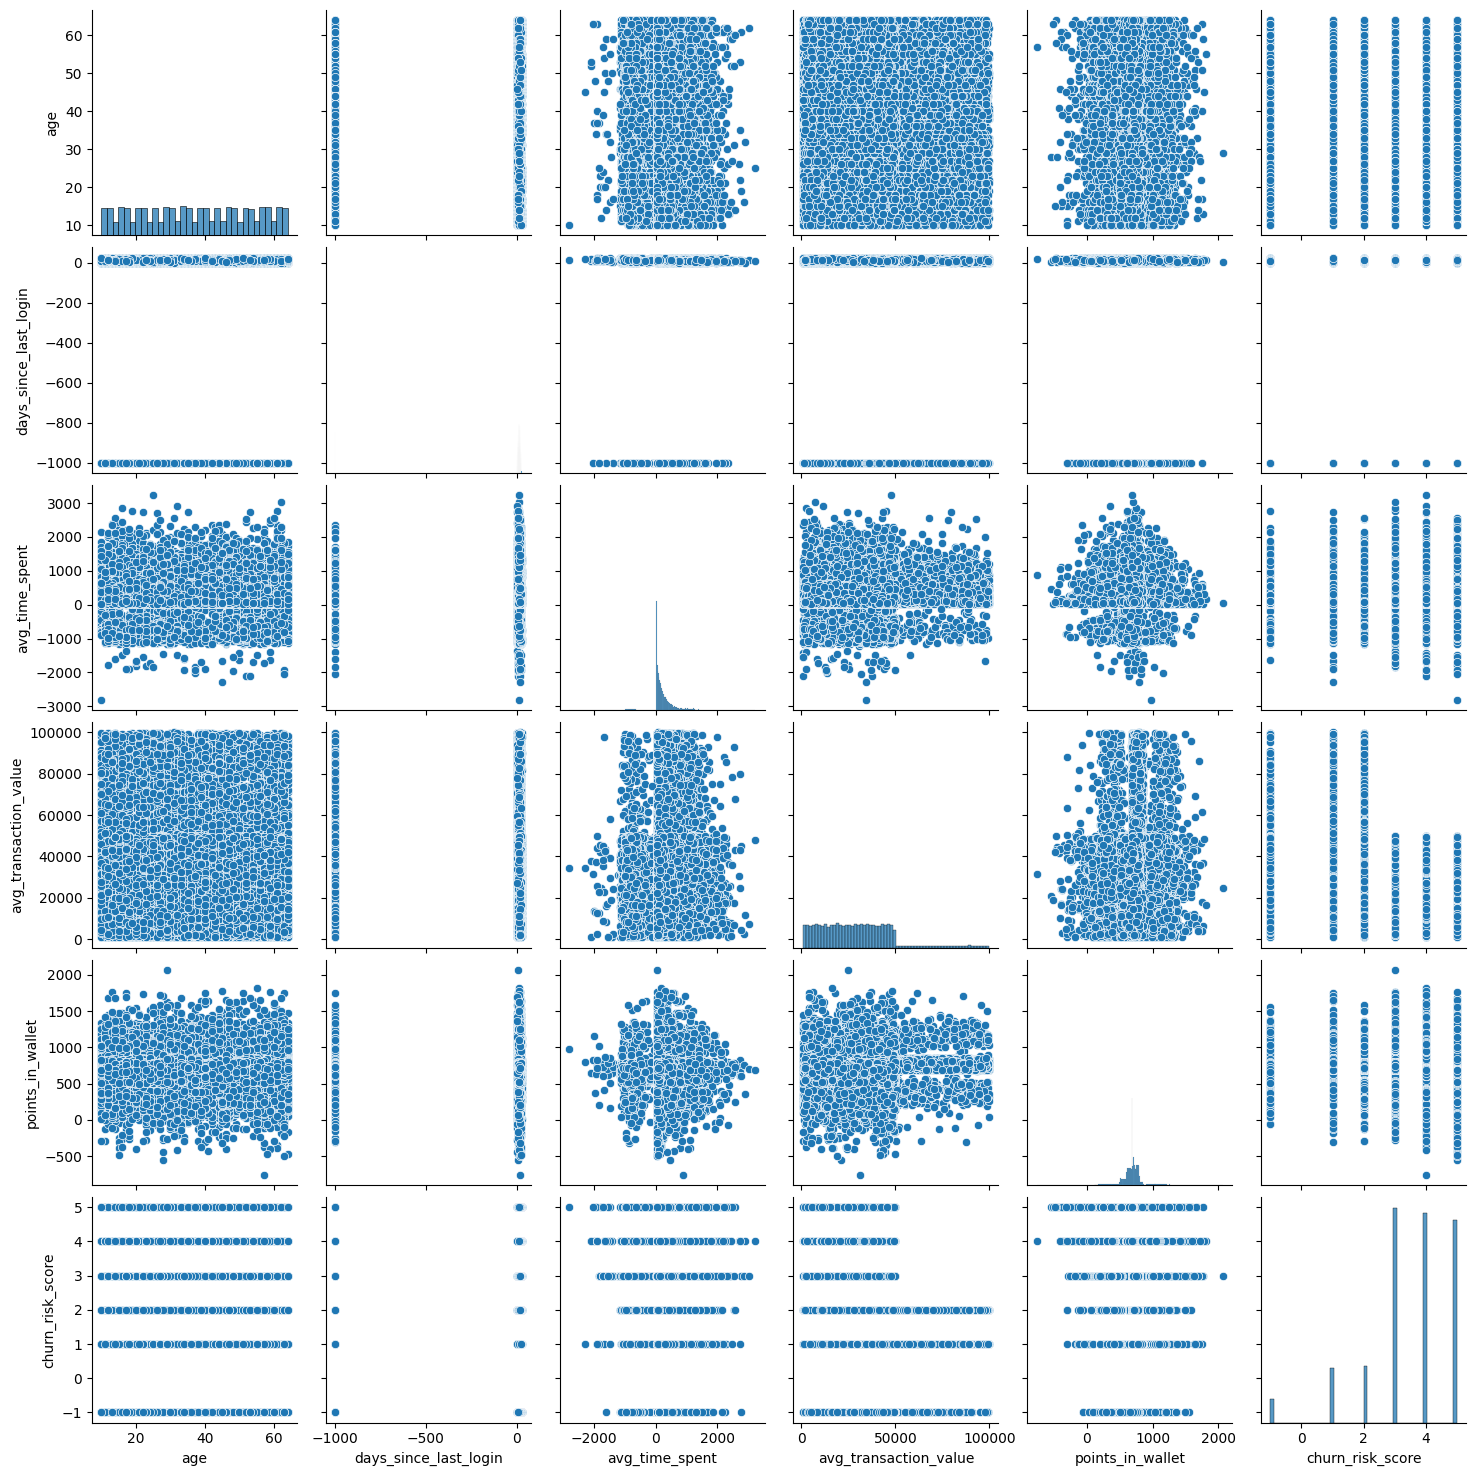

In [357]:
sns.pairplot(data=data,markers=["^","v"],palette="inferno")

Analysis of data

In [358]:
!pip install pandas_profiling

In [359]:
!pip install --upgrade pandas_profiling

In [360]:
!pip install pydantic-settings

In [361]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [362]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

In [363]:
profile = ProfileReport(data)
profile.to_file(output_file="churn.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [364]:
#Printing the count of true & false in "churn" feature
print(data["churn_risk_score"].value_counts())

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64


In [365]:
#highly correlated
data[['complaint_status','past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [366]:
data.drop('complaint_status', axis=1,inplace=True)

In [367]:
data1=data[['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet','churn_risk_score']]

In [368]:
data1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


Data Dustribution

<ipython-input-369-f78ab9b9b6a0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column])
<ipython-input-369-f78ab9b9b6a0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column])
<ipython-input-369-f78ab9b9b6a0>:9: UserWarning: 

`distplot` is a deprecated function and will be rem

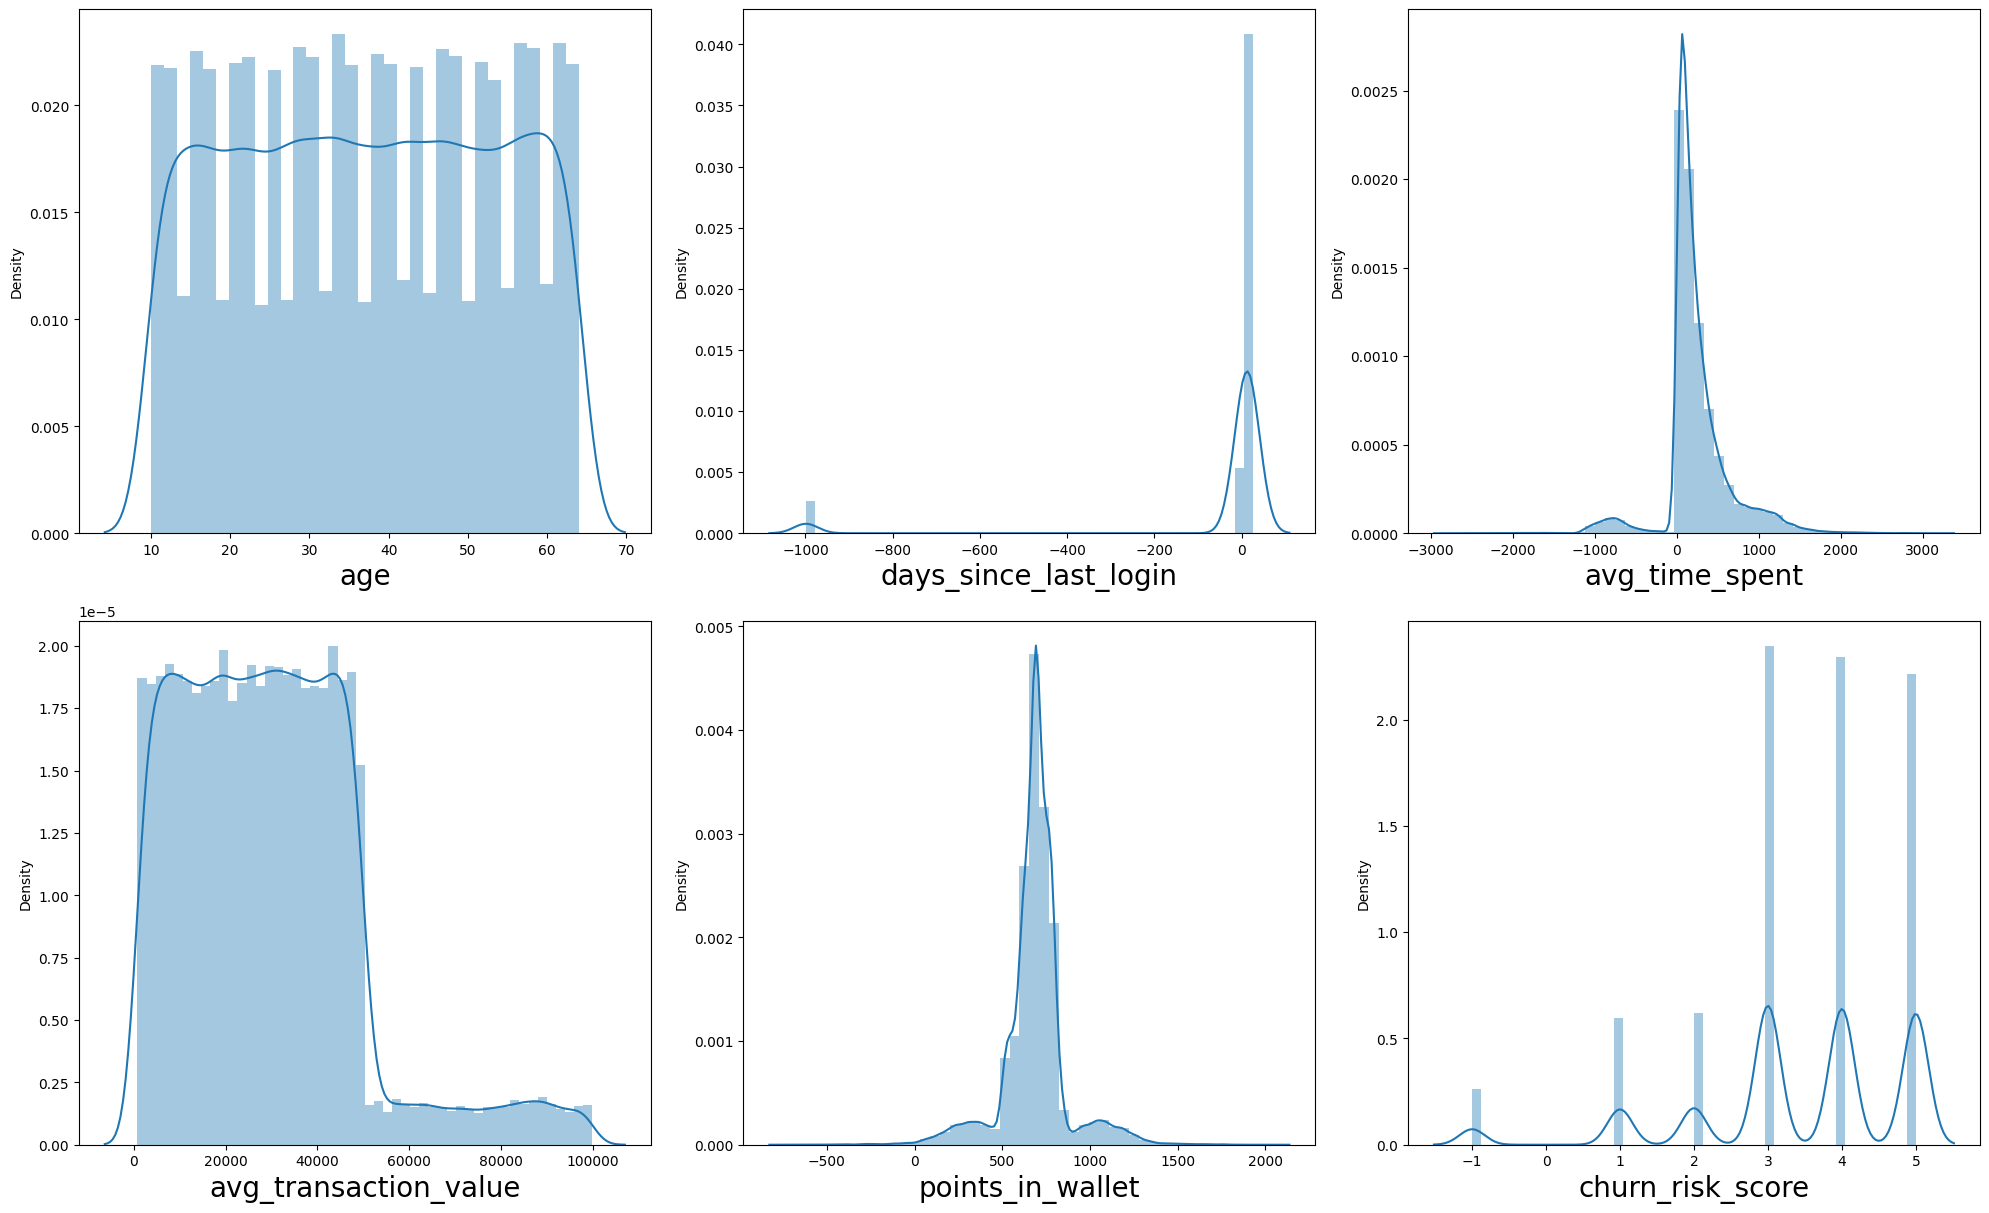

In [369]:
import seaborn as sns
#import matplotlib.pyplot as plt
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in data1:
  if plotnumber<=15:
    ax=plt.subplot(5,3,plotnumber)
    sns.distplot(data1[column])
    plt.xlabel(column, fontsize=20)

  plotnumber+=1
plt.tight_layout()

EDA

In [370]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,...,17,300.63,53005.25,17,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,...,16,306.34,12838.38,10,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,...,14,516.16,21027.00,22,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,...,11,53.27,25239.56,6,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,...,20,113.13,24483.66,16,663.060000,No,Yes,Yes,Poor Website,5


In [371]:
data[['joining_date']].head()

,joining_date
0,17-08-2017
1,28-08-2017
2,11-11-2016
3,29-10-2016
4,12-09-2017


In [372]:
data['joining_date'] = pd.to_datetime(data['joining_date'],format="%d-%m-%Y")

In [373]:
# data['joining_day'] = pd.to_datetime(data.joining_date, format="%d-%m-%Y).dt.day
# data['joining_month'] = pd.to_datetime(data.joining_date, format="%d-%m-%Y).dt.month
# data['joining_year'] = pd.to_datetime(data.joining_date, format="%d-%m-%Y).dt.year

data['joining_day'] = data['joining_date'].dt.day
data['joining_month'] = data['joining_date'].dt.month
data['joining_year'] = data['joining_date'].dt.year

In [374]:
data.drop(["joining_date"], axis=1,inplace=True)

In [375]:
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [376]:
data.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year'],
      dtype='object')

In [377]:
data[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [378]:
#Extracting hour,minute and seconds
data[['last_visit_time_hours','last_visit_time_minutes','last_visit_time_seconds']] = data['last_visit_time'].astype(str).str.split(':',expand=True).astype(int)
#droping column
data.drop(['last_visit_time'],axis=1,inplace=True)

In [379]:
data['gender'].value_counts()

,count
gender,
F,18490
M,18443
Unknown,59


In [380]:
#Showing unique data
data["gender"].unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [381]:
#calculate gender vs churn percentage
gender_data = pd.crosstab(data["gender"], data["churn_risk_score"])
#gender_data["churn_risk_score"] = gender_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(gender_data)

churn_risk_score   -1     1     2     3     4     5
gender                                             
F                 598  1333  1351  5159  5123  4926
M                 562  1315  1387  5245  5052  4882
Unknown             3     4     3    20    10    19


In [382]:
gender = pd.get_dummies(data[['gender']],drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False


In [383]:
data['region_category'].value_counts()

,count
region_category,
Town,19556
City,12737
Village,4699


In [384]:
region = pd.get_dummies(data[['region_category']],drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,False,True
1,False,False
2,True,False
3,False,False
4,False,False


In [385]:
data['membership_category'].value_counts()

,count
membership_category,
Basic Membership,7724
No Membership,7692
Gold Membership,6795
Silver Membership,5988
Premium Membership,4455
Platinum Membership,4338


In [386]:
membership = pd.get_dummies(data[['membership_category']],drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [387]:
data.joined_through_referral.value_counts()

,count
joined_through_referral,
No,15839
Yes,15715
?,5438


In [388]:
referal = pd.get_dummies(data[['joined_through_referral']],drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,True,False
1,False,False
2,False,True
3,False,True
4,True,False


In [389]:
data.preferred_offer_types.value_counts()

,count
preferred_offer_types,
Gift Vouchers/Coupons,12637
Credit/Debit Card Offers,12274
Without Offers,12081


In [390]:
offer = pd.get_dummies(data[['preferred_offer_types']],drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,True,False
1,True,False
2,True,False
3,True,False
4,False,False


In [391]:
data.medium_of_operation.value_counts()

,count
medium_of_operation,
Desktop,13913
Smartphone,13876
?,5393
Both,3810


In [392]:
medium = pd.get_dummies(data[['medium_of_operation']],drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,False,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,False,True


In [393]:
data.internet_option.value_counts()

,count
internet_option,
Wi-Fi,12413
Mobile_Data,12343
Fiber_Optic,12236


In [394]:
internet = pd.get_dummies(data[['internet_option']],drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [395]:
data.used_special_discount.value_counts()

,count
used_special_discount,
Yes,20342
No,16650


In [396]:
discount = pd.get_dummies(data[['used_special_discount']],drop_first=True)
discount.head()

,used_special_discount_Yes
0,True
1,True
2,False
3,False
4,False


In [397]:
data.offer_application_preference.value_counts()

,count
offer_application_preference,
Yes,20440
No,16552


In [398]:
application = pd.get_dummies(data[['offer_application_preference']],drop_first=True)
application.head()

,offer_application_preference_Yes
0,True
1,False
2,True
3,True
4,True


In [399]:
data.past_complaint.value_counts()

,count
past_complaint,
No,18602
Yes,18390


In [400]:
complaint = pd.get_dummies(data[['past_complaint']],drop_first=True)
complaint.head()

,past_complaint_Yes
0,False
1,True
2,True
3,True
4,True


In [401]:
data.feedback.value_counts()

,count
feedback,
Poor Product Quality,6350
No reason specified,6290
Too many ads,6279
Poor Website,6271
Poor Customer Service,6252
Reasonable Price,1417
User Friendly Website,1391
Products always in Stock,1382
Quality Customer Care,1360


In [402]:
feedback = pd.get_dummies(data[['feedback']],drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [403]:
data_train = pd.concat([data, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,True,False,False,False,False,True,False,False,False,False
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,False,True,False,False,False,False,True,False,False,False
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,True,True,False,False,True,False,False,False,False,False


In [404]:
# Replace True with 1 and False with 0
data_int = data.replace({True: 1, False: 0})
print(data_int)

                                customer_id              Name  age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membership_category  \
0         XW0DQ7H

In [405]:
data_train[['offer_application_preference_Yes']].head()

,offer_application_preference_Yes
0,True
1,False
2,True
3,True
4,True


In [406]:
data_train = data_train.replace({True: 1, False: 0})
print(data_train)

                                customer_id              Name  age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membership_category  \
0         XW0DQ7H

In [407]:
data_train[['offer_application_preference_Yes']].head()

,offer_application_preference_Yes
0,1
1,0
2,1
3,1
4,1


In [408]:
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,1,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,0,1,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,1,1,0,0,1,0,0,0,0,0


In [409]:
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hours',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_ref

In [410]:
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [411]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hours,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [412]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int32  
 7   joining_month                                36992 non-null  int32  
 8   joining_year                                 36992 non-null  int32  
 9   last_visit_time_hours                        36992 non-null  int64  
 10

In [413]:
data_train = data_train.fillna(0)

# Convert only float columns to int
data_train[data_train.select_dtypes(include='float64').columns] = data_train.select_dtypes(include='float64').astype(int)

print(data_train)

       age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0       18                     17             300                  53005   
1       32                     16             306                  12838   
2       44                     14             516                  21027   
3       37                     11              53                  25239   
4       31                     20             113                  24483   
...    ...                    ...             ...                    ...   
36987   46                      2            -650                  27277   
36988   29                     13            -638                  11069   
36989   23                     12             154                  38127   
36990   53                     15             482                   2378   
36991   35                     15              79                   2189   

       points_in_wallet  churn_risk_score  joining_day  joining_month  \
0             

In [414]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hours,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300,53005,781,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306,12838,686,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516,21027,500,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53,25239,567,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113,24483,663,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [415]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   age                                          36992 non-null  int64
 1   days_since_last_login                        36992 non-null  int64
 2   avg_time_spent                               36992 non-null  int64
 3   avg_transaction_value                        36992 non-null  int64
 4   points_in_wallet                             36992 non-null  int64
 5   churn_risk_score                             36992 non-null  int64
 6   joining_day                                  36992 non-null  int32
 7   joining_month                                36992 non-null  int32
 8   joining_year                                 36992 non-null  int32
 9   last_visit_time_hours                        36992 non-null  int64
 10  last_visit_time_minute

In [416]:
data_train.shape

(36992, 41)

Test Data

In [417]:
td = pd.read_csv("drive/MyDrive/test.csv")

In [418]:
td.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [419]:
td.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [420]:
#preprocessing
#filling categorical missing column
td['region_category']=td['region_category'].fillna(td['region_category'].mode()[0])
td['preferred_offer_types']=td['preferred_offer_types'].fillna(td['preferred_offer_types'].mode()[0])

#filling numerical missing column
td['points_in_wallet']=td['points_in_wallet'].fillna(td['points_in_wallet'].mean())


In [421]:
td.shape

(19919, 24)

In [422]:
#Eda
td.head()
td[['joining_date']].head()

td['joining_date'] = pd.to_datetime(td['joining_date'],format="%Y-%m-%d")
td['joining_day'] = td['joining_date'].dt.day
td['joining_month'] = td['joining_date'].dt.month
td['joining_year'] = td['joining_date'].dt.year

td.drop(["joining_date"], axis=1,inplace=True)

In [423]:
td.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_day,joining_month,joining_year
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,No,xxxxxxxx,Without Offers,...,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,2,11,2015
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,No,xxxxxxxx,Without Offers,...,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website,1,3,2016
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,3,3,2017
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,Yes,CID8941,Credit/Debit Card Offers,...,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads,18,8,2017
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,Yes,CID5690,Without Offers,...,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,5,5,2015


In [424]:
#Extract hr,min,sec
td[['last_visit_time_hours','last_visit_time_minutes','last_visit_time_seconds']]=td['last_visit_time'].astype(str).str.split(':',expand=True).astype(int)

#drop one column
td.drop(["last_visit_time"],axis=1,inplace=True)

In [425]:
#Handling categorical data
gender=pd.get_dummies(td[['gender']], drop_first=True)
region=pd.get_dummies(td[['region_category']], drop_first=True)
membership =pd.get_dummies(td[['membership_category']], drop_first=True)
referal=pd.get_dummies(td[['joined_through_referral']], drop_first=True)
offer=pd.get_dummies(td[['preferred_offer_types']], drop_first=True)
medium=pd.get_dummies(td[['medium_of_operation']], drop_first=True)
internet=pd.get_dummies(td[['internet_option']], drop_first=True)
discount=pd.get_dummies(td[['used_special_discount']], drop_first=True)
application=pd.get_dummies(td[['offer_application_preference']], drop_first=True)
complaint=pd.get_dummies(td[['past_complaint']], drop_first=True)
feedback=pd.get_dummies(td[['feedback']], drop_first=True)

In [426]:
data_test = pd.concat([td,gender,region,membership,referal,offer,medium,internet,discount,application,complaint,feedback])

In [427]:
data_test.drop(["customer_id","Name","gender","security_no","region_category","membership_category", "joined_through_referral","referral_id","preferred_offer_types","medium_of_operation","internet_option","used_special_discount","offer_application_preference","past_complaint","feedback","avg_frequency_login_days"], axis =1,inplace=True)

In [428]:
data_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,complaint_status,joining_day,joining_month,joining_year,last_visit_time_hours,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50.0,12.0,386.26,40721.44,733.830000,Not Applicable,2.0,11.0,2015.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.0,11.0,37.80,9644.40,726.000000,Not Applicable,1.0,3.0,2016.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31.0,18.0,215.36,3693.25,713.780000,Solved in Follow-up,3.0,3.0,2017.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64.0,-999.0,44.57,36809.56,744.970000,No Information Available,18.0,8.0,2017.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0,6.0,349.88,40675.86,299.048351,Solved in Follow-up,5.0,5.0,2015.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [429]:
data_test.shape

(239028, 41)

Feature Selection

In [430]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hours,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300,53005,781,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306,12838,686,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516,21027,500,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53,25239,567,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113,24483,663,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [431]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hours',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
 

In [432]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hours,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300,53005,781,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306,12838,686,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516,21027,500,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53,25239,567,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113,24483,663,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [433]:
x = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hours',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [434]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hours,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300,53005,781,17,8,2017,16,8,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306,12838,686,28,8,2017,12,38,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516,21027,500,11,11,2016,22,53,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53,25239,567,29,10,2016,15,57,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113,24483,663,12,9,2017,15,46,...,1,1,0,0,1,0,0,0,0,0


In [435]:
y= data_train[['churn_risk_score']]
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [436]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   age                                          36992 non-null  int64
 1   days_since_last_login                        36992 non-null  int64
 2   avg_time_spent                               36992 non-null  int64
 3   avg_transaction_value                        36992 non-null  int64
 4   points_in_wallet                             36992 non-null  int64
 5   churn_risk_score                             36992 non-null  int64
 6   joining_day                                  36992 non-null  int32
 7   joining_month                                36992 non-null  int32
 8   joining_year                                 36992 non-null  int32
 9   last_visit_time_hours                        36992 non-null  int64
 10  last_visit_time_minute

In [437]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [438]:
print(selection.feature_importances_)

[0.02389574 0.02079239 0.0251174  0.07642809 0.05911375 0.02434434
 0.02308118 0.01435377 0.02366812 0.02384053 0.02445489 0.01003449
 0.00032117 0.01092168 0.00736753 0.03137127 0.13684822 0.0387759
 0.03112598 0.05717317 0.00866608 0.00894972 0.01007957 0.00990967
 0.00624466 0.00842863 0.00843435 0.00854306 0.00993352 0.00774303
 0.00686446 0.01155915 0.00820082 0.0081865  0.00695671 0.05126501
 0.05420897 0.04703567 0.00765172 0.04810911]


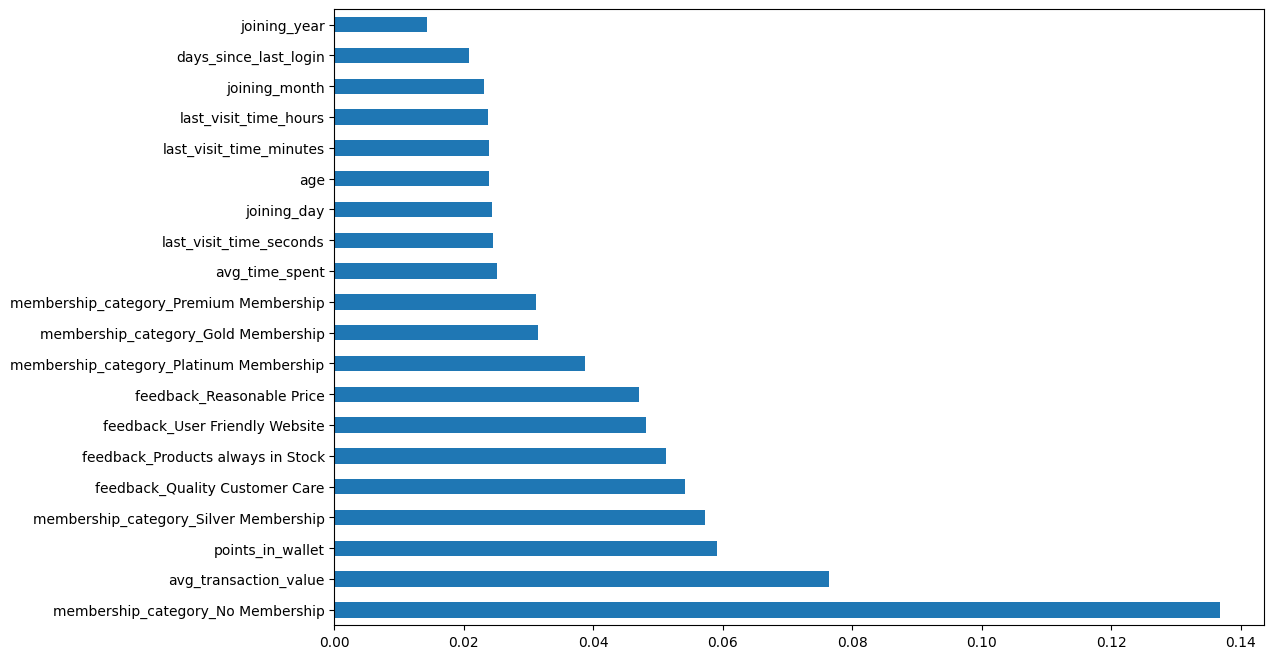

In [439]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Model Training

In [440]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hours,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300,53005,781,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306,12838,686,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516,21027,500,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53,25239,567,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113,24483,663,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [441]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [442]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hours,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572,19641,600,26,3,2015,7,26,...,1,1,0,0,0,0,0,0,1,0
28260,42,16,1427,48511,700,2,10,2015,11,43,...,1,1,1,0,0,0,0,0,0,0
31412,10,-999,-779,46612,744,8,4,2016,2,41,...,1,1,0,0,0,0,0,0,1,0
6700,12,9,245,95291,686,23,2,2016,15,29,...,0,1,0,0,0,0,0,1,0,0
31958,28,14,308,45564,716,2,1,2017,10,59,...,0,1,0,0,1,0,0,0,0,0


In [443]:
x_train.shape

(29593, 40)

In [444]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [445]:
# checking training accuracy
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  100.0


In [446]:
# checking accuracy of test dataset
print("testing accuracy is : ", rf.score(x_test, y_test)*100)

testing accuracy is :  75.13177456413028


In [447]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [448]:
# checking accuracy of test dataset
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  70.07703743749155


In [458]:
print(x_train.shape)
print(y_train.shape)
print(type(x_train), type(y_train))


(29593, 40)
(29593, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [459]:
import pandas as pd

print(x_train.isna().sum().sum())  # For pandas DataFrame
print(pd.isnull(x_train).sum().sum())  # For pandas DataFrame

print(y_train.isna().sum())  # For pandas Series
print(pd.isnull(y_train).sum())  # For pandas Series


0
0
churn_risk_score    0
dtype: int64
churn_risk_score    0
dtype: int64


In [460]:
x_train = x_train.fillna(0)  # Example: fill missing values with 0
y_train = y_train.fillna(0)  # Or another appropriate method


In [461]:
import numpy as np

print(np.unique(y_train))  # Should be [0, 1] for binary classification


[0 2 3 4 5 6]


In [462]:
y_train = np.where(y_train == -1, 0, y_train)  # Replace -1 with 0


In [464]:
import numpy as np

print(np.unique(y_train))  # Check unique values in y_train


[0 2 3 4 5 6]


In [465]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_train = le.fit_transform(y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [466]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier for multi-class classification
xg = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)))

# Fit the model
xg.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [467]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.33450466279227


Hyperparameter Tuning

In [468]:
from sklearn.model_selection import RandomizedSearchCV

In [469]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [470]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [471]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [472]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.762 total time=  13.6s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.759 total time=  10.6s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.761 total time=   2.3s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.750 total time=   2.4s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=50;, score=0.760 total time=   6.3s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.740 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.747 total time=   0.3s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.754 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.720 total time=   0.3s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.757 total ti

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [473]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

In [474]:
xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [475]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.56426544127585


Saving Model

In [476]:
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file, 'wb'))

In [477]:
load_model = pickle.load(open(file, 'rb'))

In [478]:
y_prep = load_model.predict(x_test)

In [479]:
y_prep

array([1, 4, 5, ..., 3, 3, 4])

In [480]:
y_prep[3]

3